In [1]:
!pip install scikit-learn

!pip install keras

!pip install tensorflow

In [13]:
# Importing necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Load the dataset
(x_train, y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1)


In [14]:
#Normalization
x_train = x_train.reshape(-1, 32 * 32 * 3).astype("float32") / 255.0
x_test = x_test.reshape(-1, 32 * 32 * 3).astype("float32") / 255.0


In [15]:
#Model Building
model = models.Sequential([
layers.Dense(128, activation="relu", input_shape=(3072,)),
layers.Dense(64, activation="relu"),
layers.Dense(10, activation="softmax")
])

In [16]:
#Model Compilation
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [17]:
history = model.fit(x_train, y_train, epochs = 25, batch_size = 32, validation_split = 0.3, verbose =1)

Epoch 1/25
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2527 - loss: 2.0459 - val_accuracy: 0.3567 - val_loss: 1.7950
Epoch 2/25
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3702 - loss: 1.7499 - val_accuracy: 0.3856 - val_loss: 1.7129
Epoch 3/25
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4001 - loss: 1.6742 - val_accuracy: 0.4053 - val_loss: 1.6514
Epoch 4/25
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4194 - loss: 1.6216 - val_accuracy: 0.4046 - val_loss: 1.6503
Epoch 5/25
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4330 - loss: 1.5791 - val_accuracy: 0.4266 - val_loss: 1.6122
Epoch 6/25
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4482 - loss: 1.5464 - val_accuracy: 0.4315 - val_loss: 1.6086
Epoch 7/25
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4487 - loss: 1.5366 - val_accuracy: 0.4285 - val_loss: 1.5979
Epoch 8/25
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4613 - loss: 1.5058 - 

In [18]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [19]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4745 - loss: 1.4945


[1.500870943069458, 0.4745999872684479]

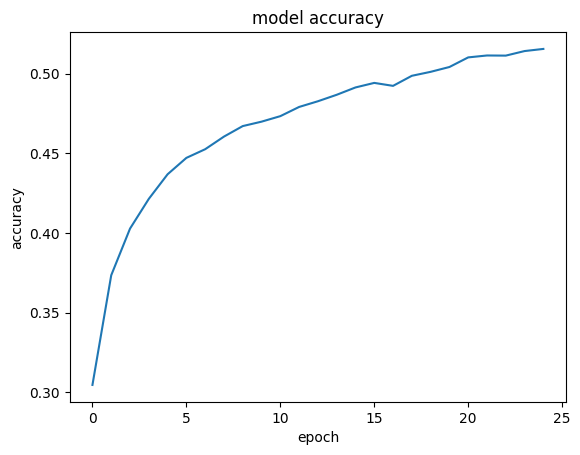

In [21]:
#accuracy graph
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

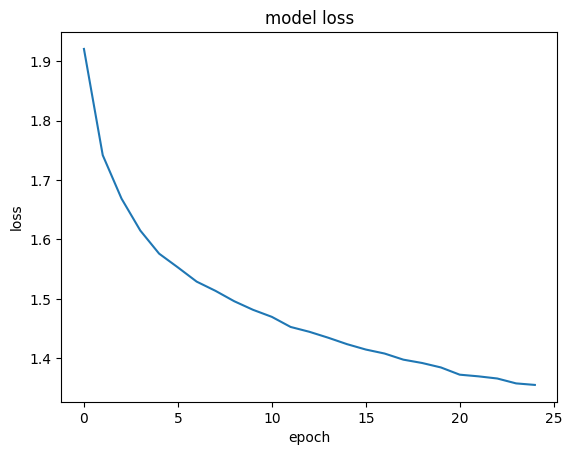

In [22]:
#loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()